<a href="https://colab.research.google.com/github/VitalyVorobyev/intro-to-dl/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
tf.device('/device:GPU:0')

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [4]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.reshape(-1, 28, 28, 1) / 255
x_test = x_test.reshape(-1, 28, 28, 1) / 255
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

In [19]:
def make_loss_acc_plots(history):
    fig, ax = plt.subplots(ncols=2, figsize=(16,5))
    nepochs = len(history.history['loss'])

    ax[0].plot(np.arange(nepochs), history.history['loss'], label='Train')
    ax[0].plot(np.arange(nepochs), history.history['val_loss'], label='Test')
    ax[0].legend(fontsize=22)
    ax[0].grid()
    ax[0].set_xlabel('epoch', fontsize=18)
    ax[0].set_ylabel('loss', fontsize=18)

    ax[1].plot(np.arange(nepochs), history.history['accuracy'], label='Train')
    ax[1].plot(np.arange(nepochs), history.history['val_accuracy'], label='Test')
    ax[1].legend(fontsize=22)
    ax[1].grid()
    ax[1].set_xlabel('epoch', fontsize=18)
    ax[1].set_ylabel('accuracy', fontsize=18)
    
    return (fig, ax)

In [13]:
def make_logistic():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation='softmax', input_shape=(28*28,)))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [14]:
def make_logistic_l2():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation='softmax', kernel_regularizer='l2', input_shape=(28*28,)))
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [15]:
def make_dence():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28, )))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

In [9]:
def make_conv():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    return model

In [30]:
def make_conv_dropout():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    return model

In [31]:
def make_conv_batchnorm():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
    # model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
    # model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    return model

In [25]:
model_logistic = make_logistic()
history_logistic = model_logistic.fit(x_train_flat, y_train, validation_data=(x_test_flat, y_test), epochs=50, batch_size=64)

Epoch 1/50
938/938 [==============================] - 3s 4ms/step - loss: 0.9684 - accuracy: 0.7006 - val_loss: 0.7415 - val_accuracy: 0.7543
Epoch 2/50
938/938 [==============================] - 3s 4ms/step - loss: 0.6702 - accuracy: 0.7854 - val_loss: 0.6503 - val_accuracy: 0.7859
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: 0.6056 - accuracy: 0.8052 - val_loss: 0.6076 - val_accuracy: 0.7972
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5707 - accuracy: 0.8145 - val_loss: 0.5808 - val_accuracy: 0.8065
Epoch 5/50
938/938 [==============================] - 3s 4ms/step - loss: 0.5476 - accuracy: 0.8213 - val_loss: 0.5658 - val_accuracy: 0.8094
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5311 - accuracy: 0.8259 - val_loss: 0.5495 - val_accuracy: 0.8131
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5183 - accuracy: 0.8288 - val_loss: 0.5437 - val_accuracy: 0.8141
Epoch 

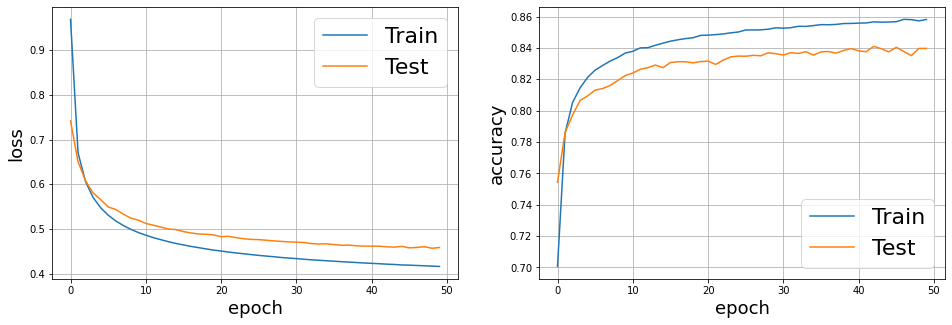

In [33]:
make_loss_acc_plots(history_logistic);
plt.savefig('logistic.png')

In [26]:
model_logistic_l2 = make_logistic_l2()
history_logistic_l2 = model_logistic_l2.fit(x_train_flat, y_train, validation_data=(x_test_flat, y_test), epochs=50, batch_size=64)

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 1.1850 - accuracy: 0.7011 - val_loss: 0.9752 - val_accuracy: 0.7470
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.8991 - accuracy: 0.7829 - val_loss: 0.8790 - val_accuracy: 0.7824
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: 0.8319 - accuracy: 0.8009 - val_loss: 0.8348 - val_accuracy: 0.7896
Epoch 4/50
938/938 [==============================] - 3s 4ms/step - loss: 0.7952 - accuracy: 0.8089 - val_loss: 0.8015 - val_accuracy: 0.8001
Epoch 5/50
938/938 [==============================] - 3s 4ms/step - loss: 0.7719 - accuracy: 0.8140 - val_loss: 0.7869 - val_accuracy: 0.8033
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.7564 - accuracy: 0.8177 - val_loss: 0.7714 - val_accuracy: 0.8061
Epoch 7/50
938/938 [==============================] - 3s 4ms/step - loss: 0.7452 - accuracy: 0.8199 - val_loss: 0.7610 - val_accuracy: 0.8091
Epoch 

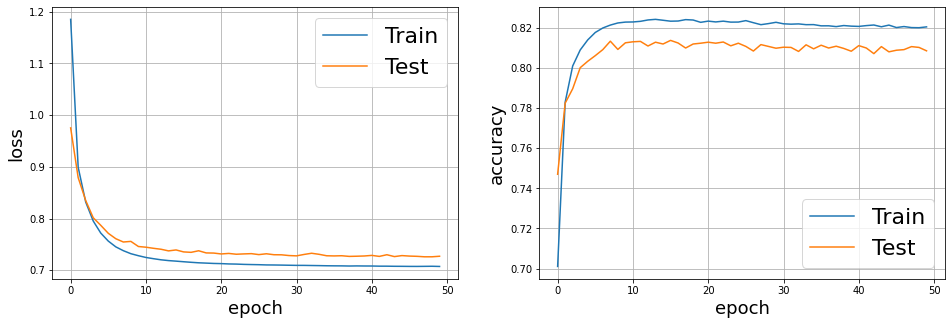

In [34]:
make_loss_acc_plots(history_logistic_l2)
plt.savefig('logistic_l2.png')

In [7]:
model = make_conv_batchnorm()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        2

In [8]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
938/938 [==============================] - 9s 10ms/step - loss: 0.4394 - accuracy: 0.8397 - val_loss: 0.4177 - val_accuracy: 0.8438
Epoch 2/30
938/938 [==============================] - 9s 10ms/step - loss: 0.3110 - accuracy: 0.8859 - val_loss: 0.3869 - val_accuracy: 0.8541
Epoch 3/30
938/938 [==============================] - 9s 9ms/step - loss: 0.2803 - accuracy: 0.8951 - val_loss: 0.3643 - val_accuracy: 0.8602
Epoch 4/30
938/938 [==============================] - 9s 9ms/step - loss: 0.2515 - accuracy: 0.9063 - val_loss: 0.3021 - val_accuracy: 0.8902
Epoch 5/30
938/938 [==============================] - 8s 9ms/step - loss: 0.2356 - accuracy: 0.9108 - val_loss: 0.2918 - val_accuracy: 0.8919
Epoch 6/30
938/938 [==============================] - 9s 9ms/step - loss: 0.2204 - accuracy: 0.9174 - val_loss: 0.3860 - val_accuracy: 0.8548
Epoch 7/30
938/938 [==============================] - 8s 9ms/step - loss: 0.2120 - accuracy: 0.9182 - val_loss: 0.3258 - val_accuracy: 0.8802
Epoc

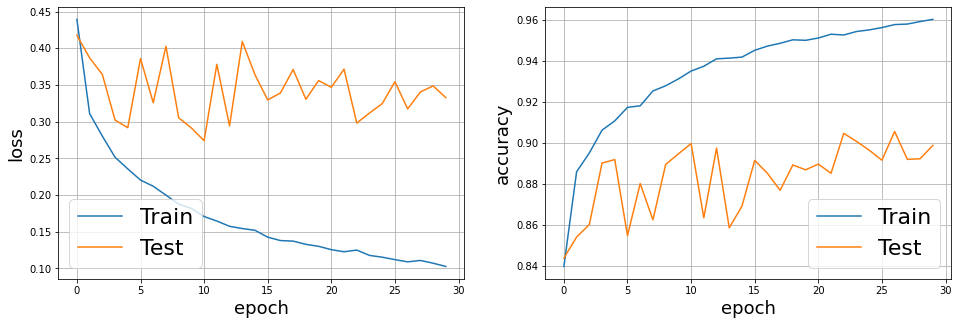

In [27]:
make_loss_acc_plots(history);
plt.savefig('conv_drop_bnorm.png')

In [11]:
model_conv = make_conv()
hist_conv = model_conv.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
938/938 [==============================] - 7s 8ms/step - loss: 0.5066 - accuracy: 0.8193 - val_loss: 0.4185 - val_accuracy: 0.8427
Epoch 2/30
938/938 [==============================] - 7s 8ms/step - loss: 0.3401 - accuracy: 0.8774 - val_loss: 0.3286 - val_accuracy: 0.8814
Epoch 3/30
938/938 [==============================] - 7s 8ms/step - loss: 0.2934 - accuracy: 0.8938 - val_loss: 0.2978 - val_accuracy: 0.8956
Epoch 4/30
938/938 [==============================] - 7s 8ms/step - loss: 0.2610 - accuracy: 0.9044 - val_loss: 0.3002 - val_accuracy: 0.8905
Epoch 5/30
938/938 [==============================] - 7s 8ms/step - loss: 0.2372 - accuracy: 0.9132 - val_loss: 0.2744 - val_accuracy: 0.9027
Epoch 6/30
938/938 [==============================] - 7s 8ms/step - loss: 0.2172 - accuracy: 0.9204 - val_loss: 0.2655 - val_accuracy: 0.9035
Epoch 7/30
938/938 [==============================] - 7s 8ms/step - loss: 0.1988 - accuracy: 0.9265 - val_loss: 0.2733 - val_accuracy: 0.9025
Epoch 

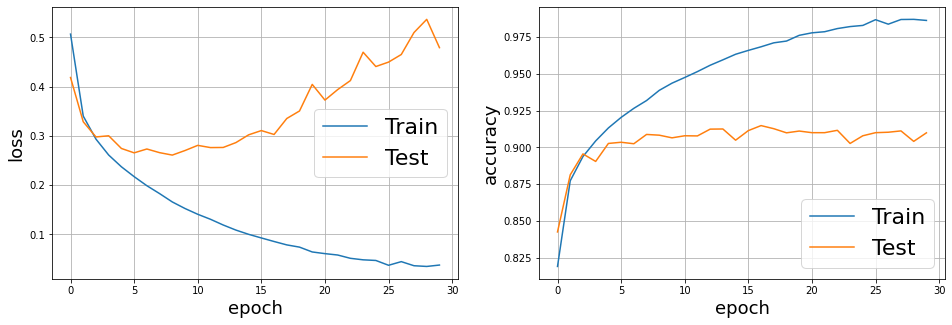

In [28]:
make_loss_acc_plots(hist_conv);
plt.savefig('conv.png')

In [12]:
model_conv_dropout = make_conv_dropout()
hist_conv_dropout = model_conv_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
938/938 [==============================] - 8s 9ms/step - loss: 0.5152 - accuracy: 0.8116 - val_loss: 0.4650 - val_accuracy: 0.8558
Epoch 2/30
938/938 [==============================] - 8s 9ms/step - loss: 0.3491 - accuracy: 0.8737 - val_loss: 0.3905 - val_accuracy: 0.8764
Epoch 3/30
938/938 [==============================] - 8s 9ms/step - loss: 0.3073 - accuracy: 0.8885 - val_loss: 0.3479 - val_accuracy: 0.8878
Epoch 4/30
938/938 [==============================] - 8s 8ms/step - loss: 0.2800 - accuracy: 0.8972 - val_loss: 0.3264 - val_accuracy: 0.8938
Epoch 5/30
938/938 [==============================] - 8s 8ms/step - loss: 0.2596 - accuracy: 0.9042 - val_loss: 0.3151 - val_accuracy: 0.8996
Epoch 6/30
938/938 [==============================] - 8s 8ms/step - loss: 0.2424 - accuracy: 0.9104 - val_loss: 0.2858 - val_accuracy: 0.9073
Epoch 7/30
938/938 [==============================] - 8s 8ms/step - loss: 0.2313 - accuracy: 0.9144 - val_loss: 0.2837 - val_accuracy: 0.9037
Epoch 

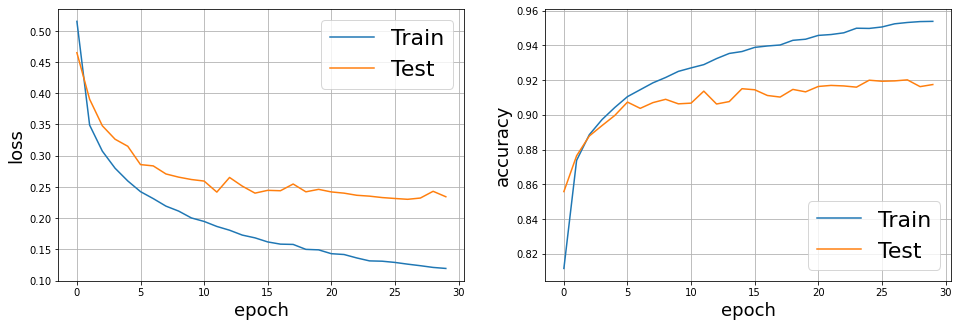

In [29]:
make_loss_acc_plots(hist_conv_dropout);
plt.savefig('conv_drop.png')

## 1. Логистическая регрессия

In [8]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)
x_test_flat.shape

(10000, 784)

In [9]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(10, activation='softmax', input_shape=(28*28,)))
model1.compile(loss='categorical_crossentropy', 
               optimizer='sgd', 
               metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
nepochs = 75
history1 = model1.fit(x_train_flat, y_train, validation_data=(x_test_flat, y_test), epochs=nepochs, batch_size=64)

Epoch 1/75
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8216 - accuracy: 0.7393 - val_loss: 0.6535 - val_accuracy: 0.7823
Epoch 2/75
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5898 - accuracy: 0.8089 - val_loss: 0.5838 - val_accuracy: 0.8024
Epoch 3/75
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5407 - accuracy: 0.8227 - val_loss: 0.5513 - val_accuracy: 0.8148
Epoch 4/75
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5141 - accuracy: 0.8286 - val_loss: 0.5300 - val_accuracy: 0.8207
Epoch 5/75
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4975 - accuracy: 0.8336 - val_loss: 0.5158 - val_accuracy: 0.8270
Epoch 6/75
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4847 - accuracy: 0.8371 - val_loss: 0.5083 - val_accuracy: 0.8266
Epoch 7/75
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4751 - accuracy: 0.8397 - val_loss: 0.4990 - val_accuracy:

In [11]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [12]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2,2)))
model3.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2,2)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', 
               optimizer= 'adam', 
               metrics=['accuracy'])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [ ]:
nepochs = 250
history3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=nepochs, batch_size=64)